**MACHINE LEARNING MINI PROJECT**

**1 Author**

Student Name :- Jayesh Kumar Soni

Student ID:- 220239129




---





#2 Problem formulation


Using MLEnd London Soundtrack dataset to build m Machile Learning Pipeline that predicts whether it has been recorded indoor or outdoors by taking input an audio file. 

We will note here that how many predictions can we taken to solve this problem and build a solution. 
An eye catching thing is to see how complex an audio signal can be and will take steps to reduce dimensionality. 


---



# 3 Machine learning pipeline


---



We are having MLEnd London Sounds dataset, which consists of 2500 audio files, from which we drawout features such as MFCC,spectral centroid, pitch, Spectral rolloff and use the Librosa library to extract meaningful features. After splitting the dataset into two parts, a training dataset and a validation dataset, and fitting a suitable model (logistic regression, Gaussian Naive Bayes in this case), we finally get the accuracy. This is shown in the image below.

#Environment set up

The following few cells will be useful in understanding the format of nomenclature in our files, and preparation of our dataset.

In [141]:
# Importing libraries and mounting google drive to colab
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [142]:
# First, let's define a function that will allow us to download a file into a chosen location.
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [143]:
url  = "https://collect.qmul.ac.uk/down?t=610I73D2G2RLS4BI/R8RDLM2R3O9FHEMR92GKGR0"
save_path = '/content/drive/MyDrive/Data/MLEndLS/MLadvance.zip'
download_url(url, save_path)

In [144]:
path = '/content/drive/MyDrive/Data/MLEndLS'
os.listdir(path)

['sample', 'MLEndLS_Sam.zip', 'MLadvance.zip']

Unzipping the sample data

In [145]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_Sam.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [146]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS/*.wav'
files = glob.glob(sample_path)

In [147]:
# Reading the MLEndLS.csv file below which shows us the 5 attributes associated to each audio file
# file_id, area, spot, in_out and Participant

MLENDLS_df = pd.read_csv('/content/MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [148]:
## We will now print the file names in our dataset, in order to cross-check if they match with the CSV 
for file in files:
  print(file.split('/')[-1])

1501.wav
1500.wav
1502.wav
1503.wav
1506.wav
1504.wav
1505.wav
1508.wav
1507.wav
1509.wav
1510.wav
1511.wav
1512.wav
1513.wav
1514.wav
1515.wav
1516.wav
1518.wav
1517.wav
1519.wav
1520.wav
1521.wav
1523.wav
1522.wav
1527.wav
1528.wav
1525.wav
1526.wav
1524.wav
1529.wav
1530.wav
1531.wav
1532.wav
1533.wav
1539.wav
1536.wav
1534.wav
1535.wav
1538.wav
1537.wav
1540.wav
1541.wav
1543.wav
1542.wav
1547.wav
1545.wav
1546.wav
1544.wav
1548.wav
1549.wav
1550.wav
1551.wav
1552.wav
1554.wav
1553.wav
1555.wav
1557.wav
1556.wav
1558.wav
1559.wav
1560.wav
1561.wav
1562.wav
1566.wav
1564.wav
1563.wav
1565.wav
1568.wav
1567.wav
1569.wav
1571.wav
1570.wav
1572.wav
1574.wav
1573.wav
1576.wav
1575.wav
1577.wav
1578.wav
1579.wav
1581.wav
1580.wav
1582.wav
1583.wav
1584.wav
1585.wav
1586.wav
1589.wav
1590.wav
1588.wav
1587.wav
1591.wav
1592.wav
1593.wav
1594.wav
1595.wav
1597.wav
1596.wav
1599.wav
1600.wav
1598.wav
1601.wav
1602.wav
1603.wav
1604.wav
1606.wav
1605.wav
1607.wav
1610.wav
1608.wav
1609.wav
1

In [149]:
# The code below gives us the spot and area along with their value counts

MLENDLS_df['area_spot'] = MLENDLS_df['area'] + "_" + MLENDLS_df['spot']
MLENDLS_df['area_spot'].value_counts()

campus_square          142
campus_ground          139
campus_canal           137
campus_curve           136
campus_reception       136
campus_library         133
westend_piazza         116
westend_charing        113
westend_market         112
westend_national       110
westend_trafalgar      109
westend_leicester      106
british_greatcourt      84
british_room12          83
british_forecourt       82
british_street          77
british_square          77
Euston_library          41
southbank_waterloo      41
Euston_upper            41
Euston_gardens          41
Euston_forecourt        40
southbank_skate         40
southbank_bridge        40
southbank_food          39
southbank_book          36
Euston_ritblat          36
Euston_piazza           35
southbank_royal         33
kensington_albert       26
kensington_hintze       26
kensington_dinosaur     25
kensington_marine       24
kensington_pond         22
kensington_cromwell     21
british_room13           1
Name: area_spot, dtype: int6

In [150]:
# shows us only the spots with their total value counts

MLENDLS_df['spot'].value_counts()

square        219
library       174
piazza        151
ground        139
canal         137
curve         136
reception     136
forecourt     122
charing       113
market        112
national      110
trafalgar     109
leicester     106
greatcourt     84
room12         83
street         77
waterloo       41
upper          41
gardens        41
bridge         40
skate          40
food           39
book           36
ritblat        36
royal          33
albert         26
hintze         26
dinosaur       25
marine         24
pond           22
cromwell       21
room13          1
Name: spot, dtype: int64

# 4 Transformation Stage


---



# Data Preprocessing

In [151]:
# We have used the sklearn preprocessing library LabelBinarizer

from sklearn.preprocessing import LabelBinarizer
df = MLENDLS_df.copy()
result_df = pd.get_dummies(df,
                     columns = ['area','in_out','spot'])
  
display(result_df)

,Participant,area_spot,area_Euston,area_british,area_campus,area_kensington,area_southbank,area_westend,in_out_indoor,in_out_outdoor,...,spot_ritblat,spot_room12,spot_room13,spot_royal,spot_skate,spot_square,spot_street,spot_trafalgar,spot_upper,spot_waterloo
file_id,,,,,,,,,,,,,,,,,,,,,
0001.wav,S151,british_street,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
0002.wav,S127,kensington_dinosaur,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0003.wav,S18,campus_square,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
0004.wav,S179,kensington_hintze,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0005.wav,S176,campus_square,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496.wav,S151,westend_trafalgar,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2497.wav,S6,campus_square,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2498.wav,S96,westend_national,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
result_df.columns

Index(['Participant', 'area_spot', 'area_Euston', 'area_british',
       'area_campus', 'area_kensington', 'area_southbank', 'area_westend',
       'in_out_indoor', 'in_out_outdoor', 'spot_albert', 'spot_book',
       'spot_bridge', 'spot_canal', 'spot_charing', 'spot_cromwell',
       'spot_curve', 'spot_dinosaur', 'spot_food', 'spot_forecourt',
       'spot_gardens', 'spot_greatcourt', 'spot_ground', 'spot_hintze',
       'spot_leicester', 'spot_library', 'spot_marine', 'spot_market',
       'spot_national', 'spot_piazza', 'spot_pond', 'spot_reception',
       'spot_ritblat', 'spot_room12', 'spot_room13', 'spot_royal',
       'spot_skate', 'spot_square', 'spot_street', 'spot_trafalgar',
       'spot_upper', 'spot_waterloo'],
      dtype='object')

In [153]:
# Let us see the relevant metrics about the dataset ->

result_df.describe()

,area_Euston,area_british,area_campus,area_kensington,area_southbank,area_westend,in_out_indoor,in_out_outdoor,spot_albert,spot_book,...,spot_ritblat,spot_room12,spot_room13,spot_royal,spot_skate,spot_square,spot_street,spot_trafalgar,spot_upper,spot_waterloo
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.0000,2500.000000,2500.0000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000
mean,0.09360,0.161600,0.329200,0.057600,0.091600,0.266400,0.472400,0.527600,0.010400,0.014400,...,0.014400,0.033200,0.0004,0.013200,0.0160,0.087600,0.03080,0.043600,0.016400,0.016400
std,0.29133,0.368157,0.470017,0.233032,0.288518,0.442164,0.499338,0.499338,0.101469,0.119157,...,0.119157,0.179194,0.0200,0.114153,0.1255,0.282769,0.17281,0.204244,0.127033,0.127033
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,1.000000


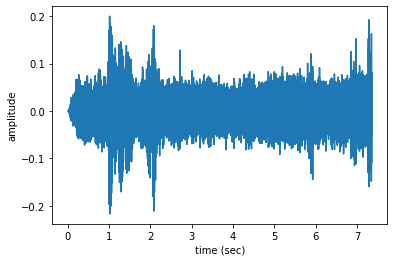

In [154]:
# Plottin one of the audio signals
n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [155]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area                southbank
spot                     book
in_out                outdoor
Participant              S102
area_spot      southbank_book
Name: 1501.wav, dtype: object

**FEATURE EXTRACTION: PITCH**

In [156]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

**FEATURE EXTRACTION: SPECTRAL CENTROID**


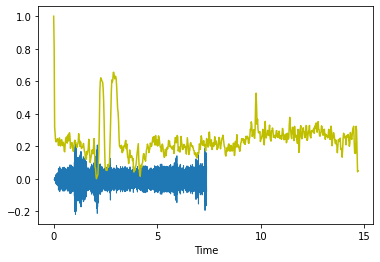

In [157]:
#Spectral Centroid -- centre of mass -- weighted mean of the frequencies present in the sound ->

import sklearn
import librosa.display
spectral_centroids = librosa.feature.spectral_centroid(x, sr= fs)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
    
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, fs)
plt.plot(t, normalize(spectral_centroids), color='y')

# 5 Modelling


---



For this problem, we have used the Gaussian Naive Bayes and Logestic Regression Machine Learning model. 


*   Gaussian Naive Bayes is a classification model and can perform in these casses very efficiently
*   Another advantage of using Gaussian Naive Bayes here is that it is suitable since our dataset is not extremely large..


*  Logistic regression is basically a supervised classification algorithm thus it can be used to check performance in supervised algorithm.





# 6 Methodology


---



In this case, we will use the 'accuracy' metric to assess the performance of our model. The code cell here depicts how complex an audio signal can be, by giving us the number of samples present in it.

In [158]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 324576 samples


# 7 Dataset


---



In [159]:
# The function below creates a NumPy array containing the four audio features (predictors i.e x) and a binary label (y)
# that shows us whether the recording is from indoors or outdoors. 

def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
   try:
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['in_out']=='indoor'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)
   except:
      files.remove(file)
      labels_file.drop(file.split('/')[-1])

  return np.array(X),np.array(y)

In [160]:
# All files

X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|█████████▉| 2498/2500 [1:12:05<00:02,  1.40s/it]<ipython-input-159-e32a8b9522c2>:14: RuntimeWarning: invalid value encountered in true_divide
  if scale_audio: x = x/np.max(np.abs(x))
100%|█████████▉| 2499/2500 [1:12:05<00:01,  1.73s/it]


In [161]:
# Printing the shape of x and y and the labels vector y ->

print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (2498, 4)
The shape of y is (2498,)
The labels vector is [False False False ... False False  True]


In [162]:
# Now we come to the final step for our problem, categorising the audio files (indoors/outdoors) ->

print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

 The number of indoor recordings is  1181
 The number of outdoor recordings is  1317


As shown above 1181 files have been recorded indoors and 1317 of the files have been recorded outside.In the following cells below, we will use Logestic Regression and Gaussian Naive Bayes to build the prediction model and then see a few things about the accuracy of our Machine Learning Model.

# LOGISTIC REGRESSION

In [163]:
# Logistic Regression -> (we use this to see if we can get a better accuracy with this model)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

53.66

In [164]:
yt_p = logreg.predict(X_train)
yv_p = logreg.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.5366132723112128
Validation  Accuracy 0.5253333333333333


Note: We can see that there is pretty much negligible difference between the training and validation accuracies if we use the logistic regression model. Hence, Logistic regression is a better fit here.

# Gaussian Naive Bayes




In [165]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train,y_train)
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)


In [166]:

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.6802059496567505
Validation  Accuracy 0.556
The support vectors are (1572, 4)


Note: We can see that there is pretty much negligible difference between the training and validation accuracies if we use the logistic regression model. Hence, Logistic regression is a better fit here.

# 8 RESULT


---



In [167]:
# Categorising the audio files (indoors/outdoors) ->

print(' The number of indoor recordings is: ', np.count_nonzero(y))
print(' The number of outdoor recordings is: ', y.size - np.count_nonzero(y))

 The number of indoor recordings is:  1181
 The number of outdoor recordings is:  1317


# 9 CONCLUSION


---



We can conclude the following from the project:


*   Gaussian Naive Bayes is a good model for this case.
*   We managed to achieve a validation accuracy of 0.59 and a training accuracy of 0.68.
*   The number of indoor recordings is 1181, while the number of outdoor recordings is 1317.